In [25]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight


In [26]:
df = pd.read_csv('file.csv')

In [27]:
df.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)
print(df.head())

   snoring rate  respiration rate  body temperature  limb movement  \
0         93.80            25.680            91.840         16.600   
1         91.64            25.104            91.552         15.880   
2         60.00            20.000            96.000         10.000   
3         85.76            23.536            90.768         13.920   
4         48.12            17.248            97.872          6.496   

   blood oxygen  eye movement  sleeping hours  heart rate  stress level  
0        89.840         99.60           1.840       74.20             3  
1        89.552         98.88           1.552       72.76             3  
2        95.000         85.00           7.000       60.00             1  
3        88.768         96.92           0.768       68.84             3  
4        96.248         72.48           8.248       53.12             0  


In [28]:
print(df.isnull().sum())

snoring rate        0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
sleeping hours      0
heart rate          0
stress level        0
dtype: int64


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring rate      630 non-null    float64
 1   respiration rate  630 non-null    float64
 2   body temperature  630 non-null    float64
 3   limb movement     630 non-null    float64
 4   blood oxygen      630 non-null    float64
 5   eye movement      630 non-null    float64
 6   sleeping hours    630 non-null    float64
 7   heart rate        630 non-null    float64
 8   stress level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [30]:

df['stress level'].value_counts()

stress level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

Text(0.5, 1.0, 'Absolute Pearson Correlation between Different Features')

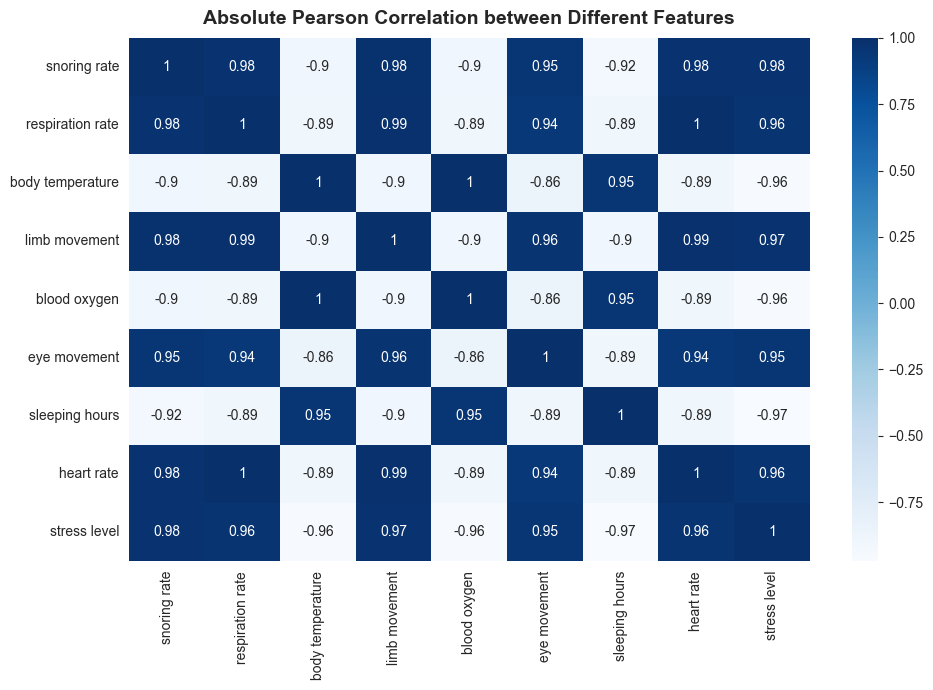

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_style("whitegrid")

plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plt.figure(figsize = (10,7))
sb.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title('Absolute Pearson Correlation between Different Features')

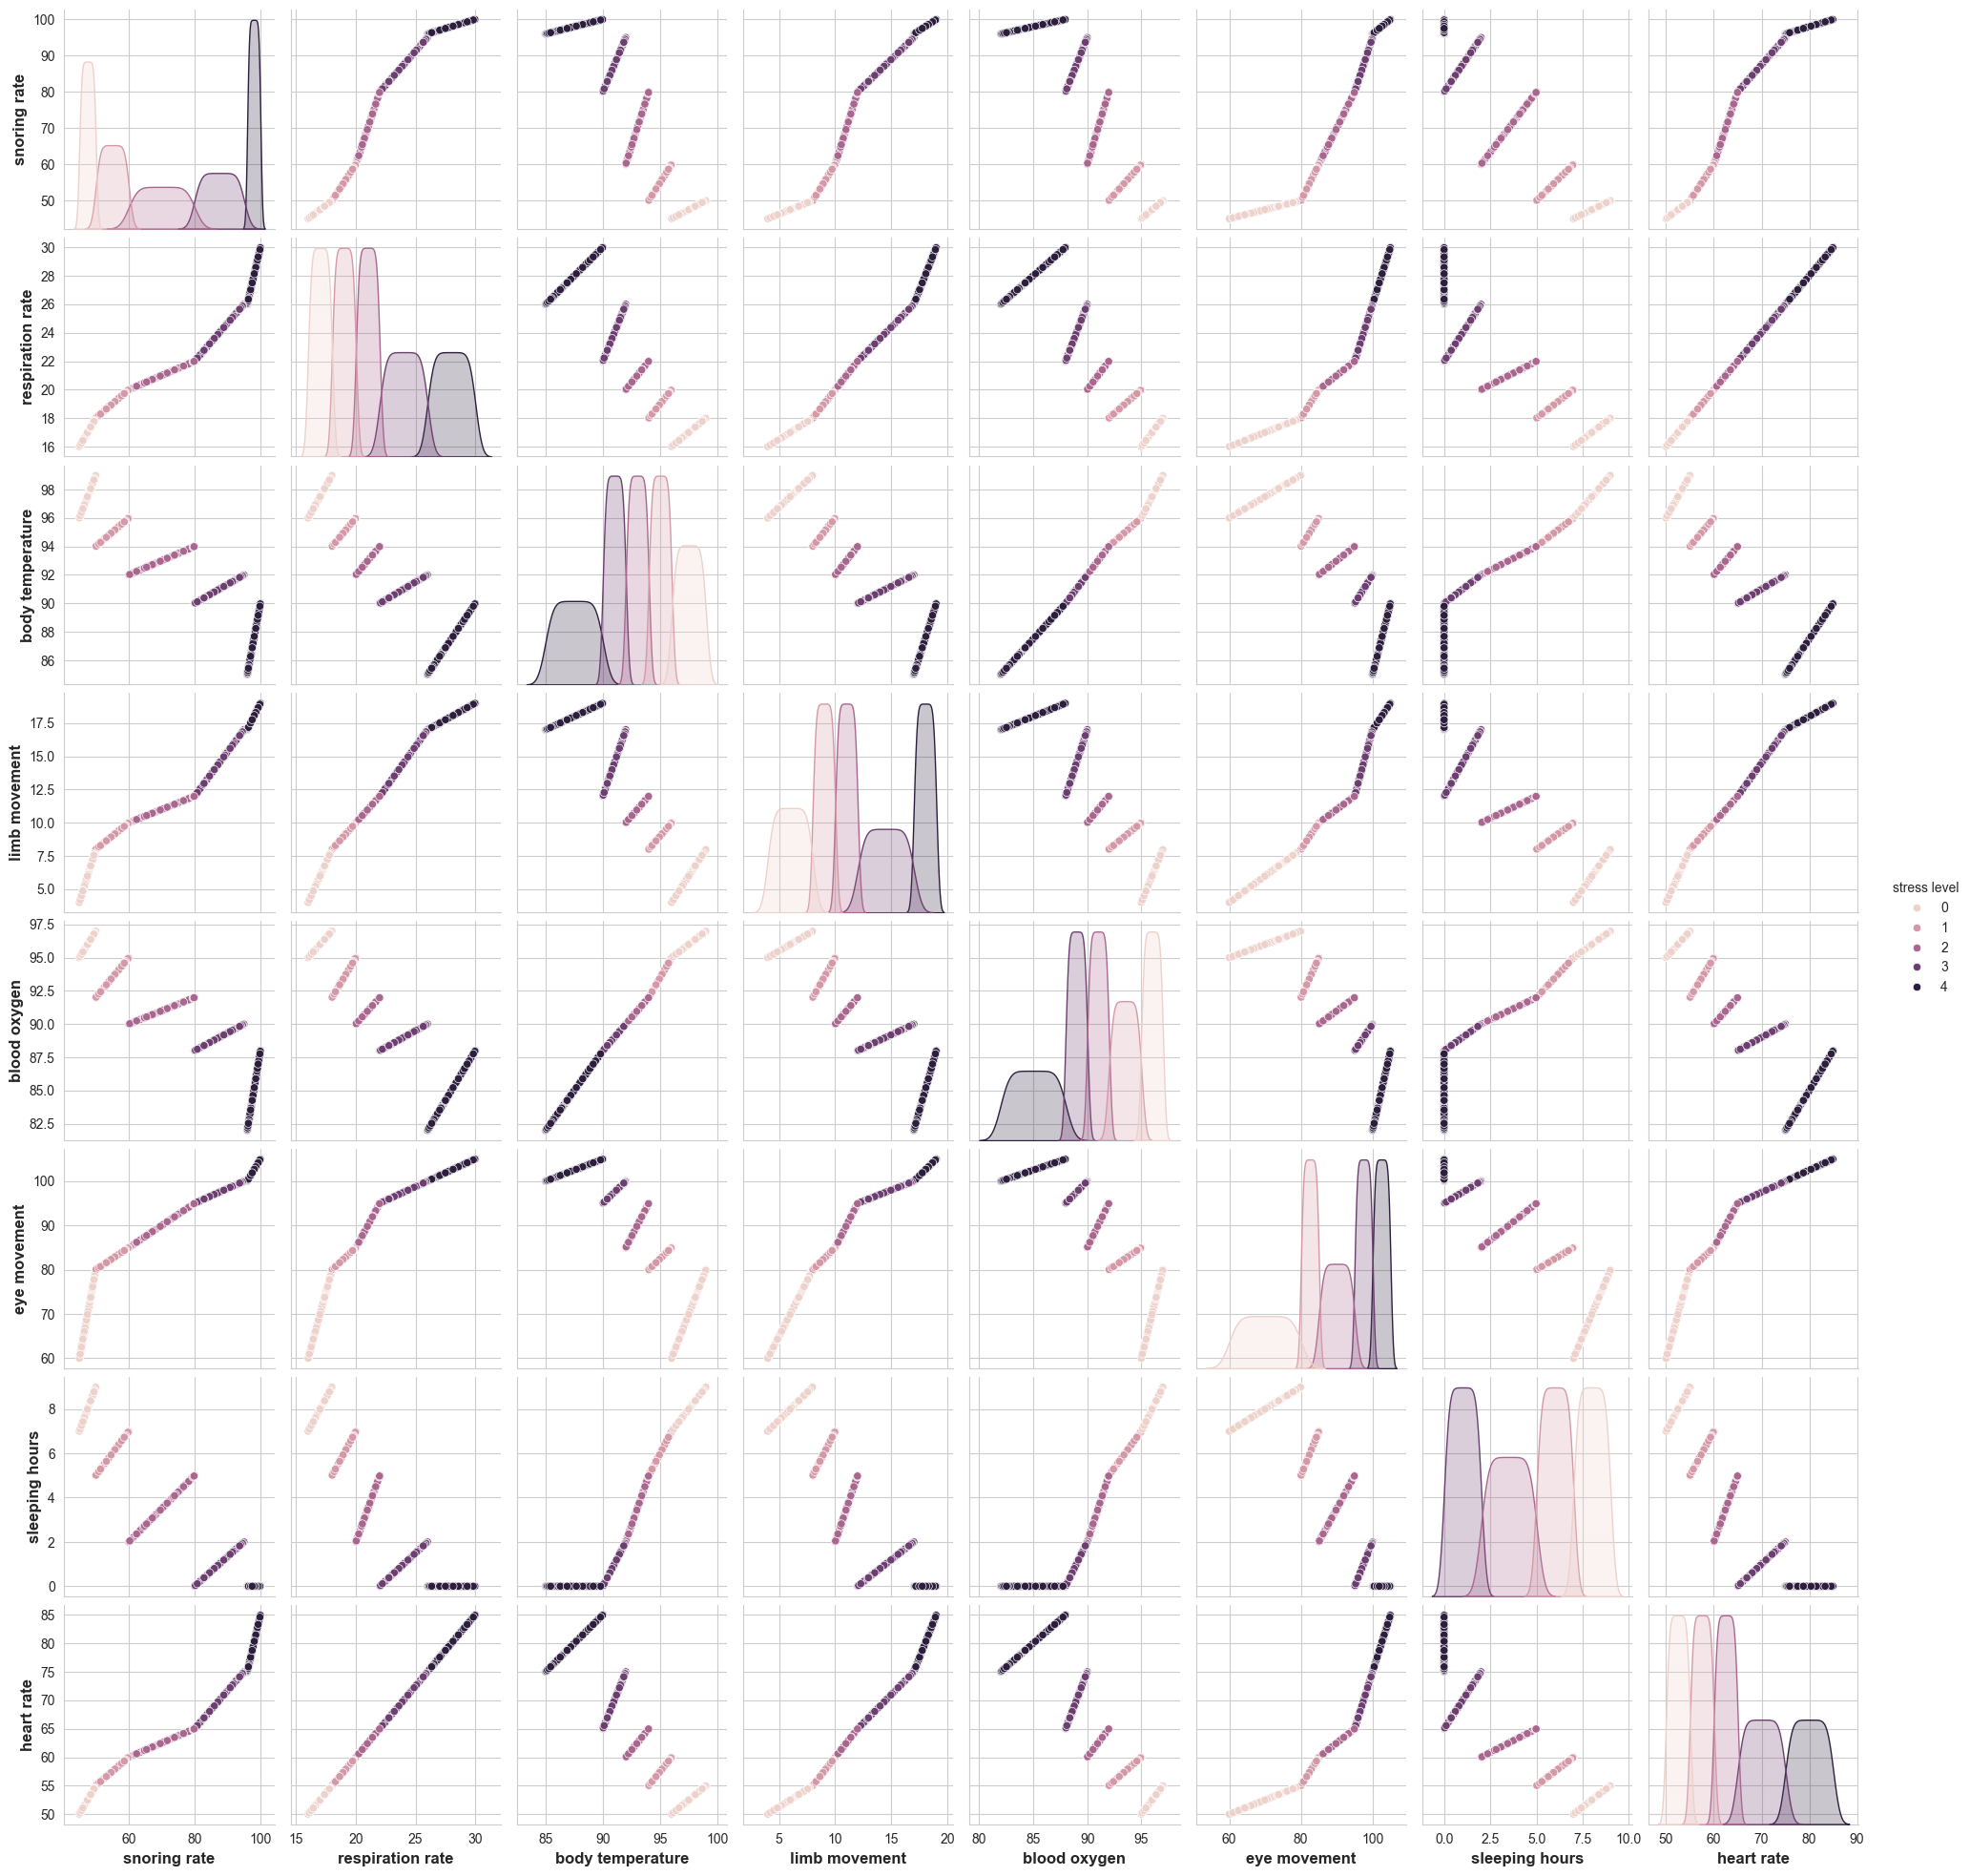

In [32]:
sb.pairplot(df, hue='stress level')

In [33]:
df.groupby('stress level').mean()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate
stress level,,,,,,,,
0,47.5,17.0,97.5,6.0,96.0,70.0,8.0,52.5
1,55.0,19.0,95.0,9.0,93.5,82.5,6.0,57.5
2,70.0,21.0,93.0,11.0,91.0,90.0,3.5,62.5
3,87.5,24.0,91.0,14.5,89.0,97.5,1.0,70.0
4,98.0,28.0,87.5,18.0,85.0,102.5,0.0,80.0


In [34]:
X = df.drop('stress level', axis=1)
y = df['stress level']


In [35]:
X

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12
...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32


In [36]:
y

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: stress level, Length: 630, dtype: int64

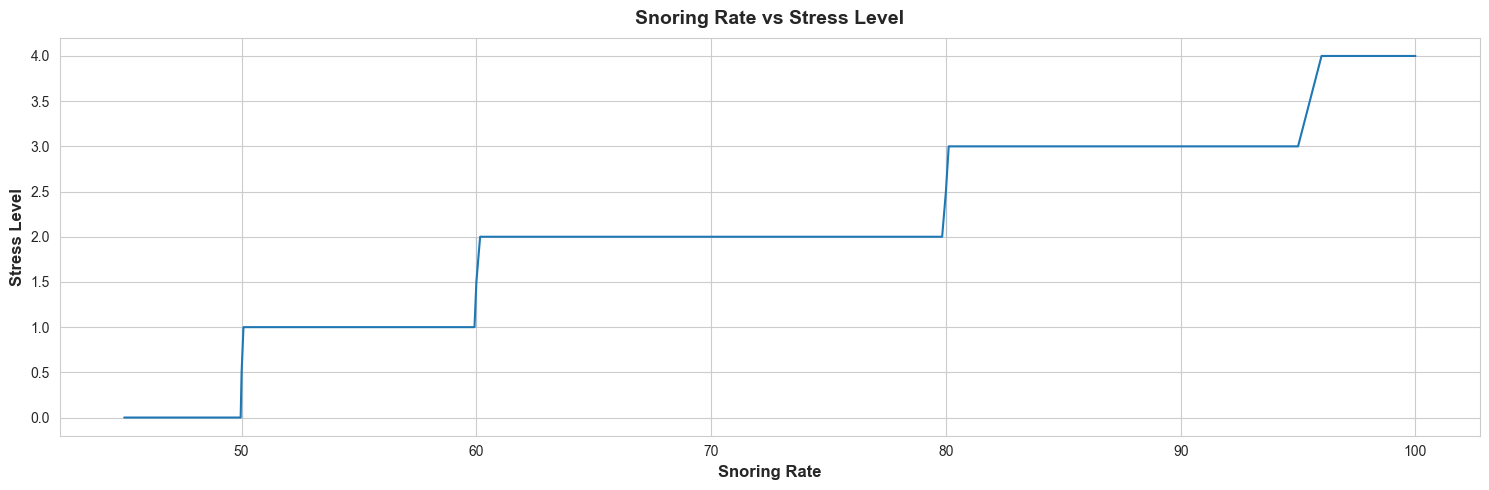

In [37]:
plt.figure(figsize=(15,5))
sb.lineplot(x='snoring rate',y='stress level',data=df)
plt.xlabel("Snoring Rate")
plt.ylabel('Stress Level')
plt.title('Snoring Rate vs Stress Level')
plt.xticks(rotation=0)
plt.show()

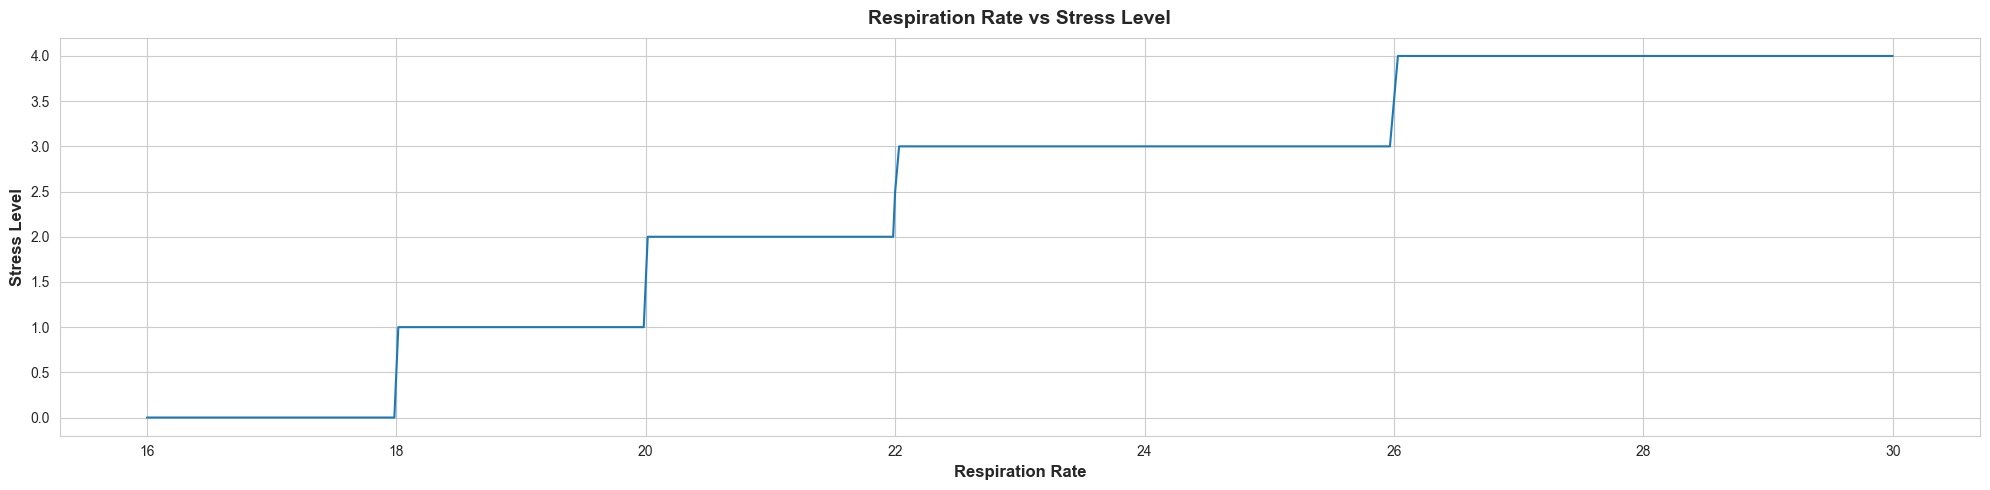

In [38]:
plt.figure(figsize=(20,5))
sb.lineplot(x='respiration rate',y='stress level',data=df)
plt.xlabel("Respiration Rate")
plt.ylabel('Stress Level')
plt.title('Respiration Rate vs Stress Level')
plt.xticks(rotation=0)
plt.show()

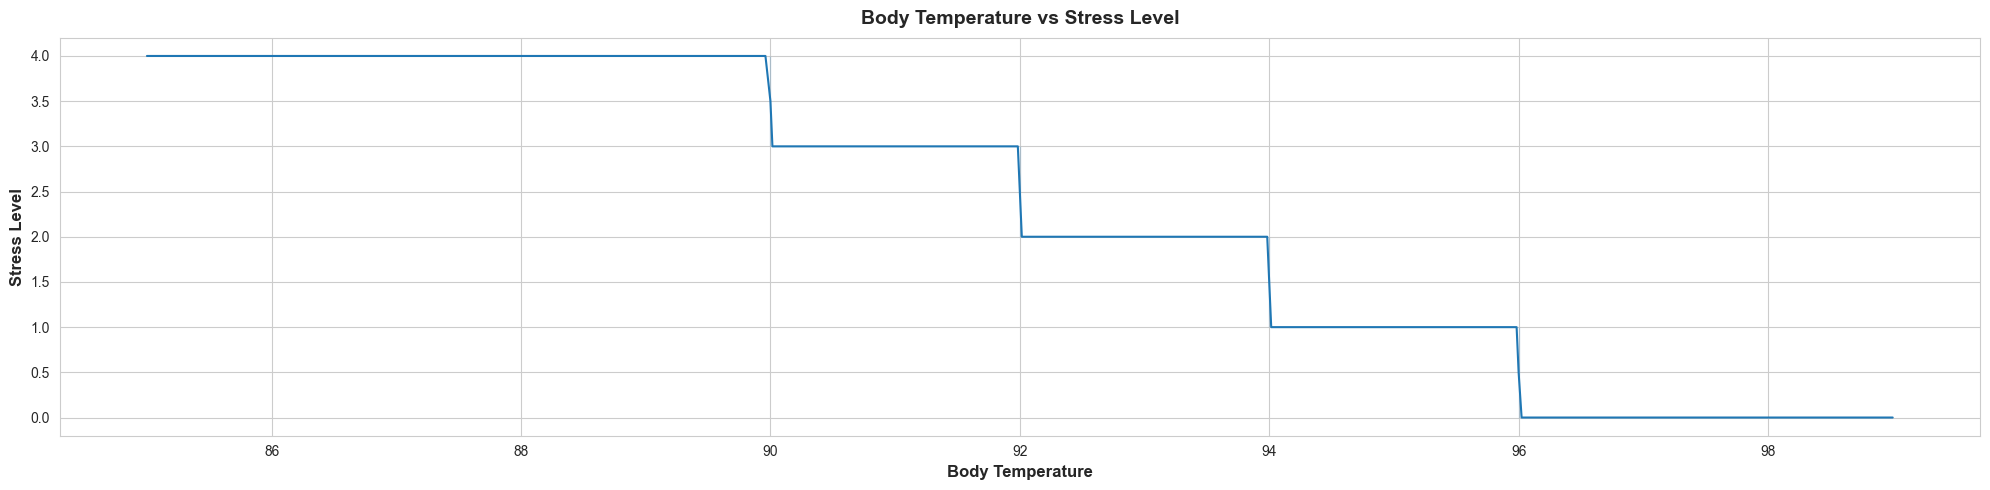

In [39]:
plt.figure(figsize=(20,5))
sb.lineplot(x='body temperature',y='stress level',data=df)
plt.xlabel("Body Temperature")
plt.ylabel('Stress Level')
plt.title('Body Temperature vs Stress Level')
plt.xticks(rotation=0)
plt.show()

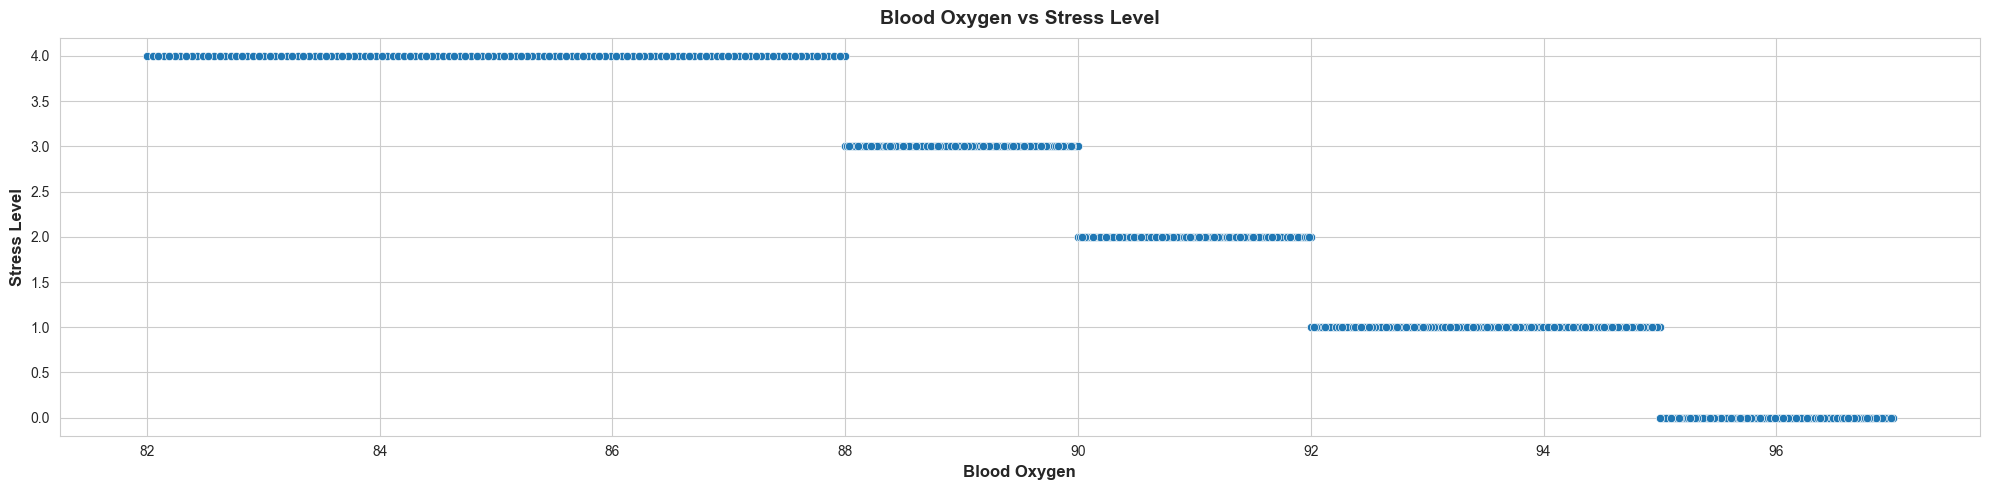

In [40]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='blood oxygen',y='stress level',data=df)
plt.xlabel("Blood Oxygen")
plt.ylabel('Stress Level')
plt.title('Blood Oxygen vs Stress Level')
plt.xticks(rotation=0)
plt.show()

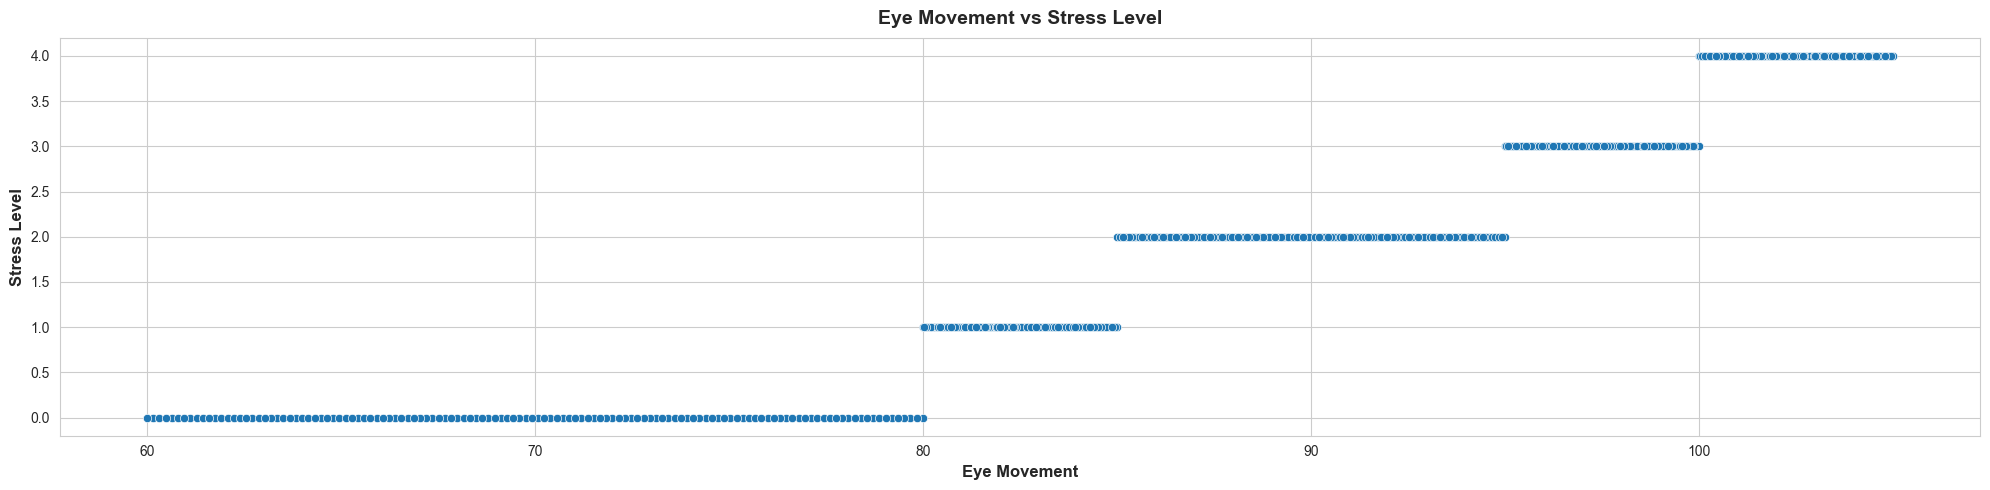

In [41]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='eye movement',y='stress level',data=df)
plt.xlabel("Eye Movement")
plt.ylabel('Stress Level')
plt.title('Eye Movement vs Stress Level')
plt.xticks(rotation=0)
plt.show()

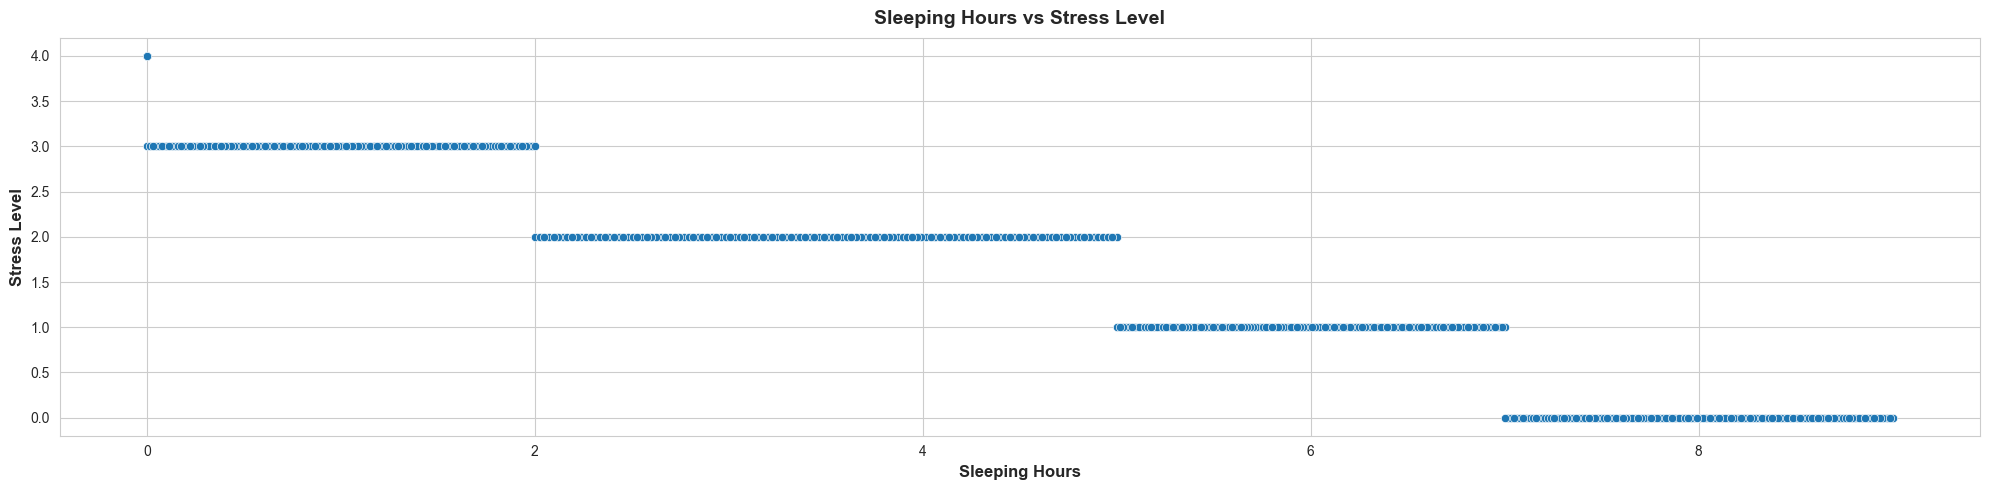

In [42]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='sleeping hours',y='stress level',data=df)
plt.xlabel("Sleeping Hours")
plt.ylabel('Stress Level')
plt.title('Sleeping Hours vs Stress Level')
plt.xticks(rotation=0)
plt.show()

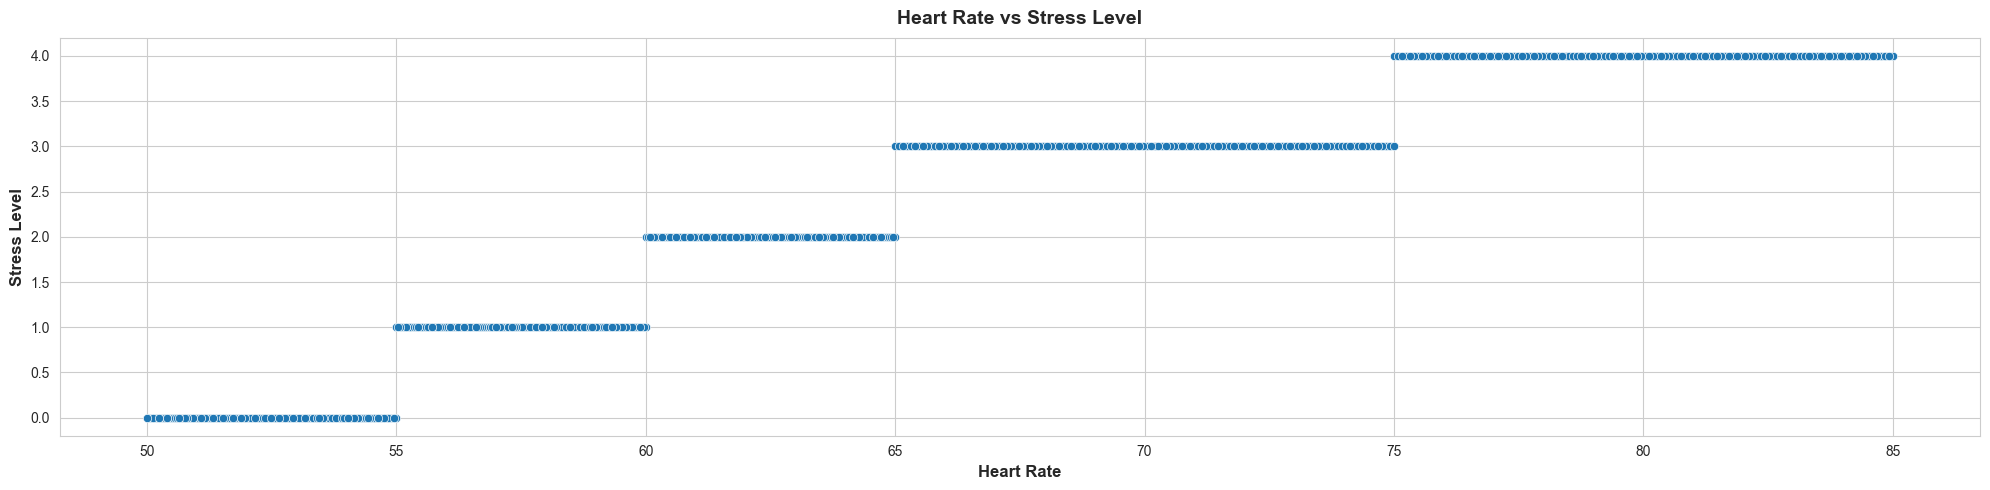

In [43]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='heart rate',y='stress level',data=df)
plt.xlabel("Heart Rate")
plt.ylabel('Stress Level')
plt.title('Heart Rate vs Stress Level')
plt.xticks(rotation=0)
plt.show()

Split the data into training and testing sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
len(X_train), len(X_test), len(y_train), len(y_test)

(504, 126, 504, 126)

Scale the data using StandardScaler

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class weight

In [47]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)


model Logistic regression for multiclass 

In [48]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight=dict(enumerate(class_weights)))

train the model

In [49]:

model.fit(X_train, y_train)

LogisticRegression(class_weight={0: np.float64(1.0), 1: np.float64(1.0),
                                 2: np.float64(1.0), 3: np.float64(1.0),
                                 4: np.float64(1.0)},
                   max_iter=1000)

In [50]:
y_pred = model.predict(X_test)
model.feature_names_in_ = X.columns

In [51]:
model.predict(X_test)

array([0, 3, 2, 0, 3, 2, 3, 1, 0, 0, 2, 4, 2, 2, 1, 4, 1, 4, 1, 2, 0, 0,
       4, 0, 0, 2, 4, 0, 2, 2, 2, 0, 2, 2, 4, 0, 3, 2, 3, 3, 4, 4, 1, 0,
       4, 1, 1, 3, 3, 3, 1, 3, 2, 3, 0, 1, 0, 1, 3, 0, 3, 3, 0, 2, 0, 1,
       4, 2, 3, 0, 2, 3, 1, 4, 3, 4, 3, 1, 2, 3, 3, 4, 3, 4, 1, 4, 2, 2,
       1, 3, 4, 1, 2, 4, 4, 2, 4, 4, 2, 4, 4, 0, 1, 2, 1, 1, 1, 1, 3, 1,
       2, 4, 1, 3, 0, 0, 1, 0, 4, 0, 2, 3, 2, 2, 4, 3])

In [52]:
np.mean(y_pred == y_test)

np.float64(1.0)

In [53]:
accuracy_score(y_test,y_pred)

1.0

In [54]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

np.float64(0.0)

In [55]:

y_pred

array([0, 3, 2, 0, 3, 2, 3, 1, 0, 0, 2, 4, 2, 2, 1, 4, 1, 4, 1, 2, 0, 0,
       4, 0, 0, 2, 4, 0, 2, 2, 2, 0, 2, 2, 4, 0, 3, 2, 3, 3, 4, 4, 1, 0,
       4, 1, 1, 3, 3, 3, 1, 3, 2, 3, 0, 1, 0, 1, 3, 0, 3, 3, 0, 2, 0, 1,
       4, 2, 3, 0, 2, 3, 1, 4, 3, 4, 3, 1, 2, 3, 3, 4, 3, 4, 1, 4, 2, 2,
       1, 3, 4, 1, 2, 4, 4, 2, 4, 4, 2, 4, 4, 0, 1, 2, 1, 1, 1, 1, 3, 1,
       2, 4, 1, 3, 0, 0, 1, 0, 4, 0, 2, 3, 2, 2, 4, 3])

In [56]:
y_preds = model.predict(X_train)
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00        98
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       101

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



In [57]:
print(accuracy_score(y_train,y_preds))

1.0


In [58]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

1.0


In [59]:
X.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate'],
      dtype='object')

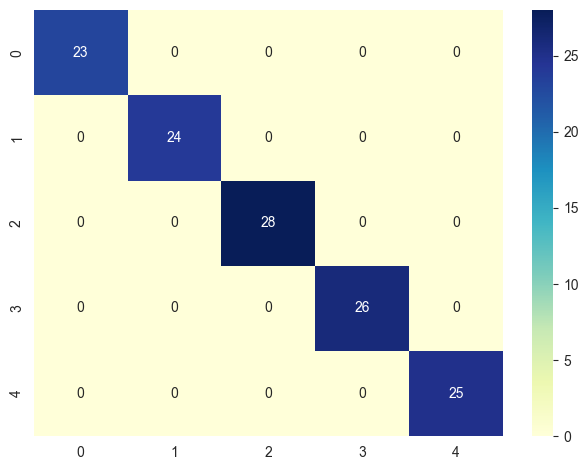

In [ ]:
mat = confusion_matrix(y_test, y_pred)
p = sb.heatmap(pd.DataFrame(mat), annot=True, cmap="YlGnBu" ,fmt='g')

In [ ]:
import pickle
pickle.dump(model, open('model1.pkl','wb'))

In [ ]:
model1 = pickle.load(open('model.pkl','rb'))

In [ ]:
new_data = pd.DataFrame([[73.92,21.392,93.392,11.392,91.392,91.96,4.088,63.48]], columns=X.columns)
model.predict(new_data)

array([2])